In [ ]:
!pip install numpy numba matplotlib scipy matplotlib line_profiler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.2/750.2 kB 16.3 MB/s eta 0:00:00


# 0. Scientific Computing

Scientific computing is an interdisciplinary field that encompasses the development and application of computational techniques and algorithms to solve complex problems in science, engineering, and other disciplines.

At its core, scientific computing leverages computational tools and methodologies to model, simulate, analyze, and visualize phenomena that are often too complex or impractical to study through traditional analytical methods alone.

By combining principles from mathematics, computer science, and domain-specific areas of study, scientific computing enables researchers and practitioners to explore and understand natural and artificial systems, predict their behavior, and make informed decisions based on quantitative analysis and computational experiments. From simulating physical processes and designing new materials to analyzing biological data and optimizing engineering systems, scientific computing plays a crucial role in advancing knowledge, driving innovation, and solving real-world problems across diverse fields of study.


Scientific Computing differs from other forms of computing due to the different requirements that are needed. Scientific Computing often requires large complicated calculations to be performed on large datasets with some degree of high performance. Some of the key things we need to consider are:

* Size of our dataset
* Numerical accuracy required
* Complex mathematical computations
* Complex data visualizations


Scientific computing often requires large computer clusters to perform calculations (e.g., simulating climate and weather patterns[^ice]) or even just to manipulate large datasets (e.g., CHIME[^chime] telescope takes O(TB/s))


[^ice]: https://www.natalyagomez.com/research.html
[^chime]: https://chime-experiment.ca/en



Today we're going to cover the following topics:
* Numerical analysis with NumPy
* Methods to improve performance
* Scientific Programming with SciPy


# 1. What is NumPy?


NumPy[^note] (Numerical Python) is one of the fundamental packages used in Scientific Python. It is a highly optimized library for working with multi-dimensional arrays and matrices. It also contains a collection of mathematical functions that can operate on these arrays and matrices while maintaining a high level of performance.


NumPy achieves its level of performance by relying on highly optimized lower-level languages like C and Fortran! Because NumPy's low-level <u><i>backend</i></u>, calls to NumPy happen outside of the Python interpreter, circumventing the Python <u><i>Global Interpreter Lock</u></i> (GIL)[^gil]. This makes NumPy an excellent framework when running concurrent code.



## 1.1 Arrays in NumPy

One of the most fundamental data types in NumPy is the powerful array. An array can be defined as follows:
```python
import numpy as np
my_list = [1,2,3,4]
my_array = np.array(my_list)
my_second_array = np.array([5,6,7,8])
```

On line 1, we `import` NumPy as `np`. `np` is the standard name that folks use when importing NumPy. We can define an array by calling `np.array()`. This function expects a list. On line 3, we pass the previously defined `my_list` to `np.array()` to create an array. On line 4, we skip the allocation of the list by directly passing the list to `np.array()`.

[^note]: https://numpy.org/
[^gil]: https://realpython.com/python-gil/



<b> Question: Create an array with the numbers between 0-10 </b>

In [ ]:
import numpy as np
arr = np.array([0,1,2,3,4,5,6,7,8,9])
print (np.sum(arr))

45


<b> Question: What happens when we combine different data types? </b>

In [ ]:
arr = np.array([0,1.2,True, "hello"])
print (type(arr[0]))

<class 'numpy.str_'>


<b> Question: Modify the below code to convert the data type to an array of booleans (True/False) </b>

In [ ]:
arr_bool = np.array([1.2, 1.4, 0, 0, 8.9, None, True, "False"], dtype = bool)
print (arr_bool)

[ True  True False False  True False  True  True]


## 1.2 Creating arrays from constructor functions


It can be pretty cumbersome to always write out each element in the list that we want to convert into an array. NumPy has many pre-made functions to create NumPy arrays:

- `np.arange` works similarly to range, allowing us to get evenly spaced values within an interval. By default, the lower value will be 0.
- `np.ones` creates an array with a predefined shape with all the values equal to 1.
- `np.zeros` creates an array with a predefined shape with all the values equal to 0.
- `np.empty` creates an array with a predefined shape without initializing the values.


<b> Question: Create an array of only even numbers between 0 and 100 (hint use the help() function to examine `np.arange`) </b>

In [ ]:
my_even_array = np.arange(0,100, 2)
print (my_even_array)

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94
 96 98]


We can combine two or more NumPy arrays using the `np.append` function. This can help us allocate memory as we need it.

Memory allocation can be an expensive operation. Calling `np.append` requires memory to be reallocated each time. The pure Python method of appending a list and then converting to a NumPy array is often a more effective method of dynamically allocating memory. Run the following cell to compare the run time for the two different methods.


In [ ]:
from time import time

large_n = int(10**4)

# Append list using append
tstart = time()
my_array = np.array([])

for i in range(large_n):
    my_array = np.append(my_array, i)

tstop = time()
numpy_duration = tstop - tstart

tstart = time()
my_array = []
# Convert to an array
for i in range(large_n):
    my_array.append(i)
my_array = np.array(my_array)
tstop = time()
list_duration = tstop - tstart

print (f"numpy append took {numpy_duration:0.2e} s")
print (f"list append took {list_duration:0.2e} s")




numpy append took 2.03e-01 s
list append took 6.84e-03 s


While NumPy is highly optimized, but often not the optimal solution. It's always important to test various solutions to find the optimal solution for our use case.

In the above example we can see that if we don't know the size of our data arrays, then appending NumPy arrays will be a slow option.

## 1.3 Math operations with NumPy


Working with NumPy arrays allows us to easily apply operations to the entirety of the array:
- Arithmetic: `+`, `-`, `*`, `/`, `**`
- Common mathematical operations: `np.sin`, `np.cos`, `np.tan`, `np.sqrt`, `np.power`, `np.abs`, `np.log`, `np.log10`, etc.
- Matrix operations: `np.transpose`, `np.dot`, `np.matmul()` (matrix multiplication), `np.linalg.inv` (matrix inversion), `np.linalg.det()` (matrix determinant), etc.
- Statistical operations: `np.mean`, `np.median`, `np.max`/`np.min`, `np.quantile`, `np.percentile`, etc.
- Random numbers: `np.random.rand` (uniform), `np.random.randn` (normal/gaussian), `np.random.randint` (random integers), `np.random.choice` (random sampling)

While a lot of this functionality exists in the Python standard library (`math`), NumPy offers highly optimized versions of these functions.

<b> Let's look at how `math` compares to `numpy` </b>

In [ ]:
import math

x = 1.2
y = math.sin(x)
y_np = np.sin(x)

print (y, y_np)

0.9320390859672263 0.9320390859672263


Let's create some data and look at how `math` varies from `numpy`.

In [ ]:
np.random.seed(42)
x_data = np.random.normal(0,1,(100,100))
print(x_data[:5, :5])

[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
 [-1.41537074 -0.42064532 -0.34271452 -0.80227727 -0.16128571]
 [ 0.35778736  0.56078453  1.08305124  1.05380205 -1.37766937]
 [-0.82899501 -0.56018104  0.74729361  0.61037027 -0.02090159]
 [-1.59442766 -0.59937502  0.0052437   0.04698059 -0.45006547]]


In [ ]:
print (np.sin(x_data[:5, :5]))

[[ 0.47653935 -0.13782419  0.60334467  0.9988594  -0.23201955]
 [-0.98794574 -0.40834961 -0.33604498 -0.71894082 -0.16058736]
 [ 0.35020257  0.53185073  0.88339184  0.86930874 -0.98140888]
 [-0.73725276 -0.53133958  0.67965603  0.57317091 -0.02090007]
 [-0.99972079 -0.56412655  0.00524368  0.04696331 -0.43502449]]


In [ ]:
print (math.sin(x_data[:5, :5]))

TypeError: only length-1 arrays can be converted to Python scalars

`math.sin` expects a float or int value not a numpy array. We need to loop over the values one-by-one.

## 1.4 Measuring runtime performance using `timeit`

Python provides the `timeit` module, which enables the measurement of execution time for specific code segments. This module offers a simple yet effective way to evaluate the performance of individual code snippets or functions:

* `%%time` will time the contents of an entire cell with a single run
* `%%timeit` will time the contents of an entire cell, averaging over multiple runs of that cell
* `%time` will time a single line with a single run
* `%timeit` will time a single line, averaging over multiple runs of that cell

`timeit` will also suspend some features, such as the garbage collector, to get an accurate measurement of the code's runtime.

<b> Let's use `%%timeit` to time how long `math.sin` will take on the entire `x_data` array. How does `np.sin` compare?</b>

In [ ]:
%%timeit
x_prime = np.empty(x_data.shape)
for i in range(x_data.shape[0]):
    for j in range(x_data.shape[1]):
        x_prime[i][j] = math.sin(x_data[i][j])

The slowest run took 4.49 times longer than the fastest. This could mean that an intermediate result is being cached.
10.9 ms ± 8.07 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
x_prime = np.sin(x_data)

169 µs ± 26.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## 1.5 Masking NumPy arrays

Since we can apply operations to the entire NumPy array, we can combine logical operations and indexing to select data. Consider the following:

In [ ]:
my_array = np.arange(0,101)
is_even = my_array % 2 == 0
print (my_array[:5])
print (is_even[:5])

[0 1 2 3 4]
[ True False  True False  True]



We can use `is_even` as a <i><b>mask</i></b> when selecting data and performing operations. Let's see if we can calculate the sum of all even numbers between 0 and 100.

In [ ]:
my_mask = my_array % 2 == 0
my_array[my_mask].sum()

2550

<b> Question: What is the sum of of all odd numbers between 0 and 100? </b>

In [ ]:
my_array[~my_mask].sum()

2500

## 1.6 Vectorization

NumPy has a built-in feature called <i><b>vectorization</i></b>. `np.vectorize` allows us to transform functions that nominally operate on single scales to operate on entire NumPy arrays. Let's look at the following example:

In [ ]:
# Define a function that will get the sqrt of a number
# Return -1 instead of complexed numbers
def capped_sqrt(x):
    if x < 0:
        return -1
    else :
        return np.sqrt(x)

In [ ]:
capped_sqrt(5), capped_sqrt(-100)

(2.23606797749979, -1)

Define an array of floats evenly spaced between -1 and 1.

We can use `np.linspace` to create an array of linearly spaced numbers over an interval and `np.logspace` to create logarithmically spaced numbers over an interval.


In [ ]:
x_data = np.linspace(-1,1)

In [ ]:
capped_sqrt(x_data)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

We should see a `ValueError` with the error message

> The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()".




This refers to the line:
```python
    if x < 0:
```
`x < 0` will evaluate the entire array, returning an array of `True` or `False` where `x < 0`. So `if x < 0` will be evaluating `[False, False, ... , True, True]`. Python doesn't know how to evaluate this.

<b> Let's solve this using a for loop </b>

In [ ]:
%%timeit
x_prime = np.empty(x_data.shape)
for i in range(x_data.shape[0]):
    x_prime[i] = capped_sqrt(x_data[i])

37.8 µs ± 653 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


`np.vectorize` allows the function to be recreated such that it can be applied to all elements of the array.

In [ ]:
capped_sqrt_vectorized = np.vectorize(capped_sqrt)

In [ ]:
%%timeit
x_prime = capped_sqrt_vectorized(x_data)

39 µs ± 1.07 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


It is important to note that `np.vectorize` doesn't always speed up functions. Its main goal is to vectorize functions by rewriting them in a form that can be applied to an entire vector of data.

In [ ]:
x_prime = capped_sqrt_vectorized(x_data)
x_prime[:10], x_prime[-10:]

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]))

What's going on here?

We'll when we use the `vectorize` function, numpy will make some assumptions about the data so that we can speed up. In this case, the data assumed output type is an integer:

In [ ]:
def capped_sqrt(x):
    if x < 0:
        # return -1
        # Explicitly setting the output to be a float
        return -1.0
    else :
        return np.sqrt(x)

capped_sqrt_vectorized = np.vectorize(capped_sqrt)

In [ ]:
x_prime = capped_sqrt_vectorized(x_data)
x_prime[:10], x_prime[-10:]

(array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]),
 array([0.79539491, 0.82065181, 0.84515425, 0.86896608, 0.89214257,
        0.91473203, 0.93677693, 0.95831485, 0.97937923, 1.        ]))

# 2. Optimizing Python

Let's imagine a flat square tile outside on a rainy day. For simplicity, let's call the width and length of the square to be 2. Now, let's say we draw a circle within the square such that the radius of the circle is 1 (i.e., its diameter is equal to 2, or the length of the square). The areas of the two shapes are:

$$ A_{square} = l \times w = 2 \times 2 = 4 $$
$$ A_{circle} = \pi r^2 = \pi (1)^2 = \pi $$

If we were to count the number of raindrops that fall in the square and in the circle, we can use the ratio of the two to estimate $\pi$:

$$ \frac{N_{circle}}{N_{square}} = \frac{\pi}{4}, $$

or

$$ \pi = 4 \times \frac{N_{circle}}{N_{square}}. $$

This holds true as the number of raindrops increases to infinity. In general, we can say:

$$ \pi \approx 4 \times \frac{N_{circle}}{N_{tot}}. $$

We'll aim to reproduce the above equation using a Monte Carlo simulation.

## 2.1 Monte Carlo Code

In [ ]:
def monte_carlo_pi(nsamples):
    acc = 0
    for i in range(nsamples):
        x = np.random.random()
        y = np.random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples

In [ ]:
monte_carlo_pi(10**4)

3.1212

Let's use `%timeit` to see how long this takes:

In [ ]:
%timeit monte_carlo_pi(10**4)

15.1 ms ± 3.07 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Not bad, but if we want to optimize our code, we need to understand what we're spending most of our runtime on. For this we use line profiles like `line_profile`.

In [ ]:
# Load the line profile
%load_ext line_profiler

In [ ]:
%lprun -f monte_carlo_pi monte_carlo_pi(10**4)

Line profilers are perfect for trying to identify where in the code we have a bottleneck. From the above we can see that we're spending about 60% of the time generating random numbers and a further 20% of the time checking if the random numbers land within the circle. If we want to optmize this code, these should be the areas to focus on.

<b> Question: How can we speed up this calculation?</b>

In [ ]:
def numpy_calculate_pi(nsamples):
    x = np.random.random(size = nsamples)
    y = np.random.random(size = nsamples)
    # Recall we can filter/mask using logic and applying to the entire array
    # sum will cast true -> 1 and false -> 0
    n_in = sum(x**2 + y**2 < 1)
    return 4. * n_in / nsamples

In [ ]:
%timeit monte_carlo_pi(10**4)

15.2 ms ± 3.52 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit numpy_calculate_pi(10**4)

1.65 ms ± 468 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Rewriting the code to use numpy, avoid looping and performing the summation in a single step provides a significant speedup!

## 2.2 Working with Numba

Numba is a <b><i>just-in-time</b></i> (JIT) compiler that allows us to compile Python code to machine code at runtime. This optimization provides a significant boost in speed.

We can use Numba by decorating functions with the `@jit` decorator.

In [ ]:
from numba import jit

In [ ]:
@jit
def jit_calculate_pi(nsamples):
    x = np.random.random(size = nsamples)
    y = np.random.random(size = nsamples)
    n_in = sum(x**2 + y**2 < 1)
    return 4. * n_in / nsamples

Let's run this and the previous example one and time the execution using `%time`.

In [ ]:
%time numpy_calculate_pi(10**4)

CPU times: user 2.4 ms, sys: 6 µs, total: 2.41 ms
Wall time: 2.81 ms


3.1316

In [ ]:
%time jit_calculate_pi(10**4)

CPU times: user 1.88 s, sys: 187 ms, total: 2.06 s
Wall time: 2.25 s


3.1644

Why did it take longer to execute?
As the phrase <b><i>just-in-time</b></i> suggests, we only compile the code in time for it to be executed. This means that the first time the function is executed, it is first compiled by Numba. After the first time, we'll use the compiled version of the function, not needing to recompile it.

Let's run the function again:

In [ ]:
%time jit_calculate_pi(10**4)

CPU times: user 268 µs, sys: 0 ns, total: 268 µs
Wall time: 364 µs


3.1368

Thats better!

It is good practice to pre-compile and pre-run the functions before they are actually used. This is especially important if we're going to be running a long process for the first execution. Using the example above, instead of running with $10^4$ iterations on the first time, we could simply run with 1 iteration.


## 2.3 Running code in Parallel with Numba

We can pass optional arguments to the `@jit` decorator to further improve the runtime performance. We might want to utilize our entire CPU when running the code. This is known as parallelism or parallel programming. Simply adding `parallel=True` to the decorator unlocks that ability:

In [ ]:
@jit(parallel= True)
def parallel_calculate_pi(nsamples):
    x = np.random.random(size = nsamples)
    y = np.random.random(size = nsamples)
    n_in = sum(x**2 + y**2 < 1)
    return 4. * n_in / nsamples

parallel_calculate_pi(1)

4.0

In [ ]:
%timeit jit_calculate_pi(10**4)

166 µs ± 37.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
%timeit parallel_calculate_pi(10**4)

184 µs ± 64.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


We (might) observe a slight improvement in the runtime, which will depend on your own machine and the number of processors available. The performance will roughly scale with the number of cores your CPU has.

We can use `prange` to specify a `for` loop that we want to run in parallel.

In [ ]:
from numba import prange

In [ ]:
@jit(parallel=True)
def prange_pi(nsamples):
    acc = 0
    for i in prange(nsamples):
        x = np.random.random()
        y = np.random.random()
        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
    return 4.0 * acc / nsamples
prange_pi(1)

0.0

In [ ]:
%timeit prange_pi(10**4)

277 µs ± 114 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit monte_carlo_pi(10**4)

14.7 ms ± 3.46 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Using Numba's <b>just in time</b> compiler can provide significant speed up to our code with very little overhead.

# 3. Working with SciPy

SciPy, short for <b>Scientific Python</b>, is a powerful open-source library built on top of the Python programming language, designed to facilitate scientific and technical computing. SciPy is part of the NumPy ecosystem, allowing for SciPy to be easily incorperated into a NumPy-based analysis pipeline. SciPy offers a vast array of tools and functions to handle a wide range of mathematical and scientific tasks commonly encountered in physics studies and research.

Some functionality includes:
- Solving differential equations (e.g. `scipy.integrate.solve_ivp`, `scipy.integrate.ode`)
- Performing numerical integration (e.g. `scipy.integrate.simps`, `scipy.integrate.quad`)
- Conducting statistical analysis (e.g. `scipy.stats`)
- Minimization and model fitting (e.g. `scipy.optimize.minimize`, `scipy.optimize.curve_fit`)


SciPy provides efficient and user-friendly solutions that streamline complex computational tasks. Its extensive functionality, combined with the simplicity and flexibility of Python syntax, makes SciPy an indispensable tool for tackling various challenges in theoretical and experimental physics. From simulating physical systems to analyzing experimental data and visualizing results.

In [ ]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

## 3.1 Minimizing functions using minimize
We can use SciPy to numerically minimize a function using `scipy.optimize.minimize`. Let's see an example of this. Let's define a simple potential energy of a mass attached to a spring with linear and constant offset components:
$$
U(x) = \frac{1}{2} k x^2 + c x + d
$$

Here $k$ is our spring constant, $c$ and $d$ are coefficients for a linear and constant component. We can analytically solve this as:
$$
\frac{dU}{dx} = 0 \Rightarrow x_{min} = \frac{-c}{k}
$$

Let's see how to use `scipy.optimize.minimize` to numerically find $x_{\text{min}}$.

0.40000009536743164
0.4


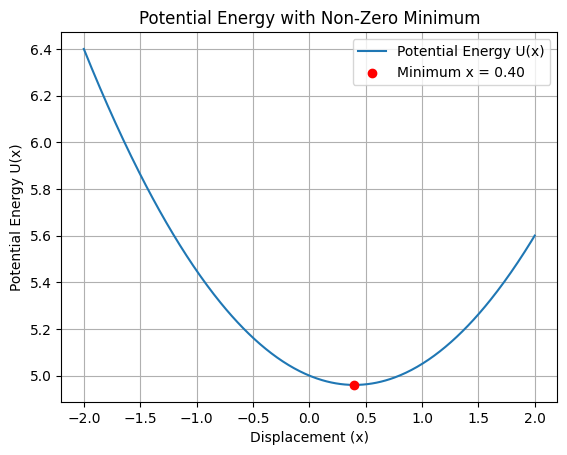

In [ ]:
from scipy.optimize import minimize
# Define the potential energy function with non-zero minimum
def potential_energy(x, k=0.5, lam=0.1, c=-0.2, d=5):
    return 0.5 * k * x**2 + c * x + d

# Initial guess for the minimum position
x0 = np.array([0.5])

# Perform the minimization
result = minimize(potential_energy, x0)


# Plot the potential energy function and the minimum point
x_values = np.linspace(-2, 2, 400)
y_values = potential_energy(x_values)

plt.plot(x_values, y_values, label='Potential Energy U(x)')
plt.scatter(result.x, result.fun, color='red', zorder=5, label=f'Minimum x = {result.x[0]:0.2f}')
plt.xlabel('Displacement (x)')
plt.ylabel('Potential Energy U(x)')
plt.title('Potential Energy with Non-Zero Minimum')
plt.legend()
plt.grid(True)

print (result.x[0])
print (- (-0.2) / 0.5)

## 3.2 Minimizing n-dimensional functions

We can also easily minimize n-dimensional functions using `scipy.optimize.minimize`. The number of dimensions, or parameters that a function takes, is assumed from the shape of the initial guess. We can access the parameters at which the minimum occurs using:

```python
results = sp.optimize.minimize(func, x0)
x_min = results.x
```

Where `x_min` will have the same shape as `x0`.

Let's try to minimize a 2D function known as the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function), a function that is commonly used as a benchmark for minimization algorithms.


$$ f(x,y) = (a - x)^2 + b(y - x^2)^2 $$

With typically `a = 1`, `b = 100`.

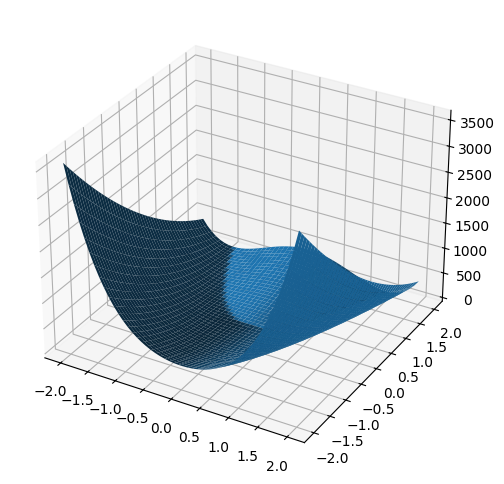

In [ ]:
from scipy.optimize import rosen

fig = plt.figure(figsize = (11,6))
x = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, x)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, rosen([X, Y]))


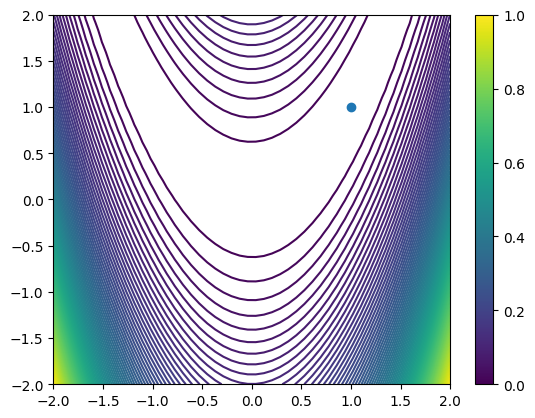

In [ ]:
p = plt.contour(X, Y, rosen([X, Y]), levels=100 )
plt.scatter(1,1)
plt.colorbar()

In [ ]:
minimize(rosen, [0,0])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.8439915001532524e-11
        x: [ 1.000e+00  1.000e+00]
      nit: 19
      jac: [ 3.987e-06 -2.844e-06]
 hess_inv: [[ 4.948e-01  9.896e-01]
            [ 9.896e-01  1.984e+00]]
     nfev: 72
     njev: 24

<b> Exercise:</b>

Find the point of intersection between the line and the parabola using `scipy.optimize.minimize`

Let:

$$
f(x) = m x + c
$$


$$
g(y) = p_0 y^2 + p_1 y + p_2
$$

m = 0.1, c = 0, $p_0$ = -1, $p_1 = 3$, $p_2 = 7$

In [ ]:
# Define a line
def line(x, m, c):
    return x * m + c

# Define a parabola
def para(x, args):
    return args[0] * x ** 2 + args[1] * x + args[2]

Text(0.5, 0, 'X')

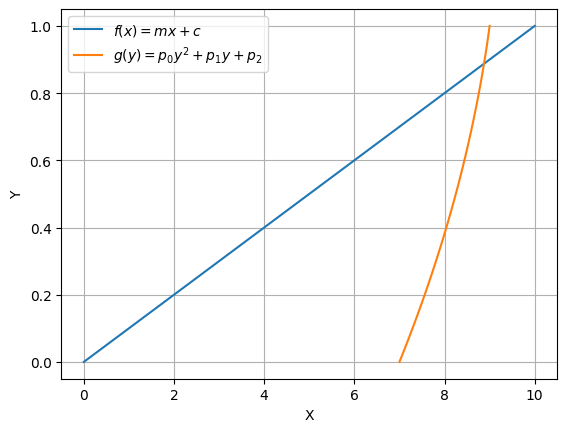

In [ ]:
m = 0.1
c = 0
x = np.linspace(0, 10)
y = np.linspace(0,1)

args = [-1, 3, 7]
plt.plot(x, line(x, m, c), label = "$f(x) = mx + c$")
plt.plot(para(y, args), y, label = "$g(y) = p_0 y^2 + p_1 y + p_2$")
plt.grid()
plt.legend()
plt.ylabel("Y")
plt.xlabel("X")



<b> How can we approach this? </b>

In [ ]:
def dist(x):
    m = 0.1
    c = 0
    args = [-1, 3, 7]
    y_test = line(x,m,c)
    return np.abs( x - para(y_test, args))

In [ ]:
x_opt = sp.optimize.minimize(dist, 9).x[0]
y_opt = line(x_opt, m, c)
print (x_opt, y_opt)

8.87482193358592 0.8874821933585921


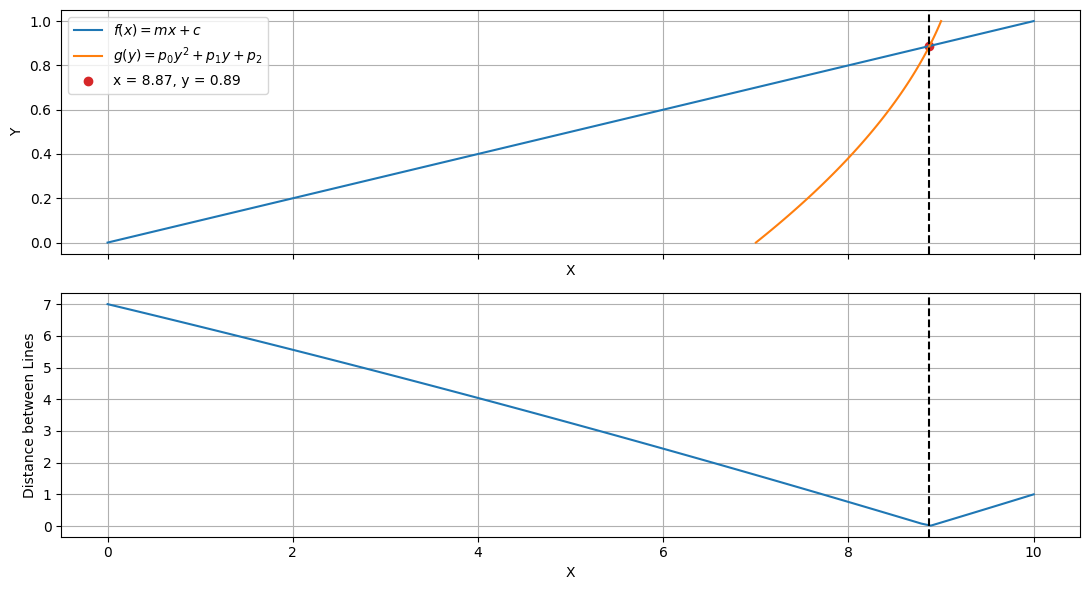

In [ ]:

fig, axs = plt.subplots(2,1, figsize = (11,6), sharex = True)
axs[0].plot(x, line(x, m, c), label = "$f(x) = mx + c$")
axs[0].plot(para(y, args), y, label = "$g(y) = p_0 y^2 + p_1 y + p_2$")
axs[0].scatter(x_opt, y_opt, color = "C3", label = f"x = {x_opt:0.2f}, y = {y_opt:0.2f}")
axs[0].axvline(x_opt, color = "k", ls = "--")

axs[0].grid()
axs[0].legend()
axs[0].set_ylabel("Y")
axs[0].set_xlabel("X")

x_plot = np.linspace(0,10,100)
axs[1].plot(x_plot, dist(x_plot))
axs[1].axvline(x_opt, color = "k", ls = "--")
axs[1].grid()
axs[1].set_ylabel("Distance between Lines")
axs[1].set_xlabel("X")

fig.tight_layout()

## 3.4 Fitting a Model to Data

`scipy.optimize.curve_fit` provides an easy-to-use function for fitting a model to a dataset.



`scipy.optimize.curve_fit` will provide a least-squares minimization of a function such that:
$$
\text{minimize} \sum_{i} (y_i - f(x_i, \theta))^2
$$
Where $y_i$ and $x_i$ are the measurements, $f(x, \theta)$ is the model, and $\theta$ is the model parameters.


If errors are provided to `scipy.optimize.curve_fit` (e.g., `curve_fit(f, x, y, sigma=y_err)`), then a $\chi^2$ minimization is performed:
$$
\text{minimize} \sum_{i} \frac{(y_i - f(x_i, \theta))^2}{\Delta y_i^2}
$$


Let's define an exponential decay model:

$$ f(x) = N e^{-x \tau} + c$$

In [ ]:
def model(x, *args):
    return args[0] * np.exp(- x * args[1]) + args[2]

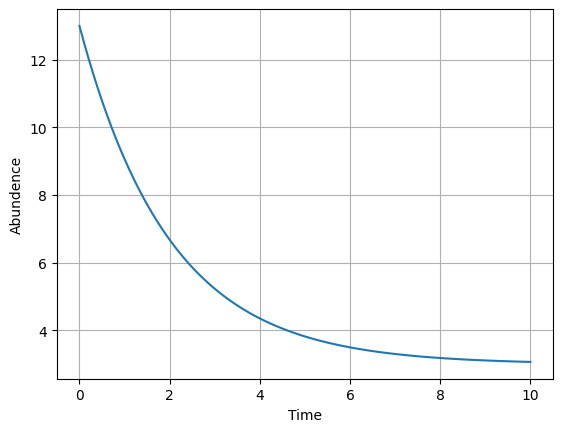

In [ ]:
true_parameters = [ 10, 0.5, 3]
plt.plot(x_plot, model(x_plot, *true_parameters))
plt.xlabel("Time")
plt.ylabel("Abundence")
plt.grid()

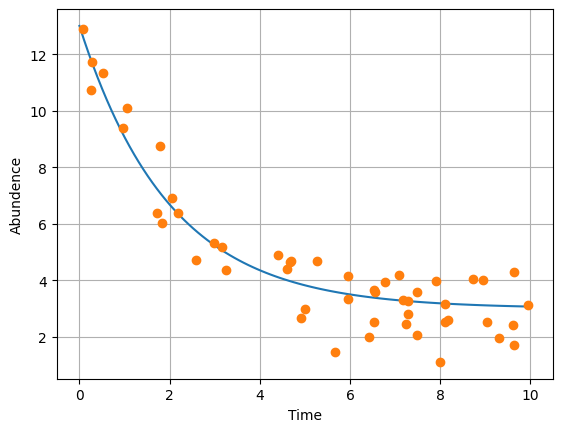

In [ ]:
# Generate some noisy data using numpy.random
np.random.seed(12345)
x_data = np.random.uniform(0,10, size = 50)
# Adding noise to the data
y_data = np.random.normal(0, 0.9, size = 50) + model(x_data, *true_parameters)

plt.plot(x_plot, model(x_plot, *true_parameters))
plt.plot(x_data, y_data, "C1o")
plt.xlabel("Time")
plt.ylabel("Abundence")
plt.grid()

In [ ]:
# Get get the best fit parameters
guess = [ 1, 1, 1]

popt, pcov = sp.optimize.curve_fit(model, x_data, y_data, p0 = guess)
print (popt)
print (pcov)

[10.28404428  0.46501049  2.70482802]
[[ 0.26219225  0.00951629 -0.01244426]
 [ 0.00951629  0.00316383  0.01059212]
 [-0.01244426  0.01059212  0.05940681]]


`curve_fit` returns the optimal parameters (`popt`) and the covariance matrix (`pcov`).

We can get the estimated uncertinty from the covariance matrix:
$$pcov_{i,j} = \partial x_{i} \partial x_{j}$$

So the uncertiy on parameter $i$ is:
$$\Delta x_i = \sqrt{\partial x_{i}^2} = \sqrt{pcov_{i,i}}$$

In [ ]:
perr = np.sqrt(np.diag(pcov))
for t, p, e in zip(true_parameters, popt, perr):
  print (f"True {t:0.2f} -> {p:0.2f} +/- {e:0.2f}")

True 10.00 -> 10.28 +/- 0.51
True 0.50 -> 0.47 +/- 0.06
True 3.00 -> 2.70 +/- 0.24


Here we have gaussian noise, where everything is very well behaved. Let's look at a more challanging exampe.

In [ ]:
np.random.seed(12345)
x_data = np.random.uniform(0, 10, 100)
y_data = np.array([ np.random.poisson(model(x, *true_parameters)) for x in x_data ])

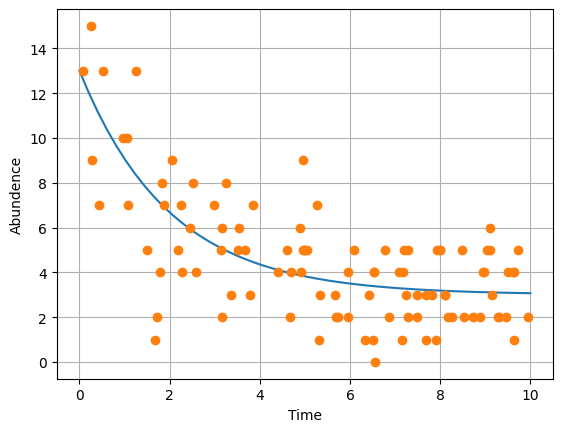

In [ ]:
x_plot = np.linspace(0,10)
plt.plot(x_plot, model(x_plot, *true_parameters))
plt.plot(x_data, y_data, "C1o")
plt.xlabel("Time")
plt.ylabel("Abundence")
plt.grid()

In [ ]:
# Get get the best fit parameters
guess = [ 1, 1, 1]

popt, pcov = sp.optimize.curve_fit(model, x_data, y_data, p0 = guess)

In [ ]:
perr = np.sqrt(np.diag(pcov))
for t, p, e in zip(true_parameters, popt, perr):
  print (f"True {t:0.2f} -> {p:0.2f} +/- {e:0.2f}")

True 10.00 -> 9.58 +/- 1.08
True 0.50 -> 0.55 +/- 0.11
True 3.00 -> 3.16 +/- 0.33


## 3.5 How can we be confident in our best-fit parameters?

It can often be difficult to validate parameters. Sometimes we might not have a good grasp of the measured uncertainties, making the uncertainty on the fit parameters also questionable.

One method we can use to help with this is called <i><b>Bootstrapping</i></b>. Bootstrapping can be done as follows:

1. Start with a sample of data with n observations.
2. Resample the data to draw n random samples from the dataset. Here we can repeat samples from the original dataset (i.e., if our original dataset is [1,2,3,4], our resampled dataset could be [1,1,3,2]).
3. Fit the model to the resampled datasets and store parameters of interest (e.g., best-fit parameters).
4. Repeat steps 2 and 3 a large number of times (e.g., 1000).
5. Use the distribution of the parameters obtained from the resampled datasets to estimate properties of these distributions.

Since we are resampling the original dataset, the bootstrapped distributions will represent the uncertainties and limitations of our dataset. Bootstrapping is an excellent way to test for biases, estimate uncertainties and confidence intervals, and extract properties for otherwise difficult to sample distributions.


<b>Write a function to perform a bootstrap fit. It should take in a function, x-data, y-data, and some initial guess.</b> Use the following as a guide:

```{code-block} python
def bootstrap(func, x, y, yerr=None, nboot=100, p0=None):
    """Function performing a bootstrap fit to data

    Args:
        func: The function to fit our data to.
        x: The x data
        y: The y data
        yerr: The uncertainty on y (optional)
        n_boot: The number of bootstrap samples
        p0: The initial guess for the fitter

    Returns:
        Bootstrap samples with shape [n_boot, n_free_parameters]

    """
```



In [ ]:
def bootstrap(func, x, y, yerr = None, nboot = 100, p0 = None):
    """Function performing a bootstrap fit to data

    Args:
        func: The function to fit our data to.
        x: The x data
        y: The y data
        yerr: The uncertainty on y (optional)
        n_boot: The number of bootstrap samples
        p0: The initial guess for the fitter

    Returns:
        Bootstrap samples with shape [n_boot, n_free_parameters]

    """
    samples = []

    for i in range(nboot):
        try:
            rnd_int = np.random.choice(
                np.arange(len(x)),
                size=len(x),
                replace=True
            )
            x_samp = x[rnd_int]
            y_samp = y[rnd_int]
            if yerr is not None:
                y_samp_err = y_err[rnd_int]
            else:
                y_samp_err = None

            p, _ = sp.optimize.curve_fit(func, x_samp, y_samp, p0=p0, maxfev = 10000 )
            samples.append(p)
        except RuntimeError as e:
            continue
    return np.array(samples)

In [ ]:
samples = bootstrap(model, x_data, y_data, p0 = [5, 1, 1], nboot = 1000)

/usr/local/lib/python3.11/dist-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/usr/local/lib/python3.11/dist-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


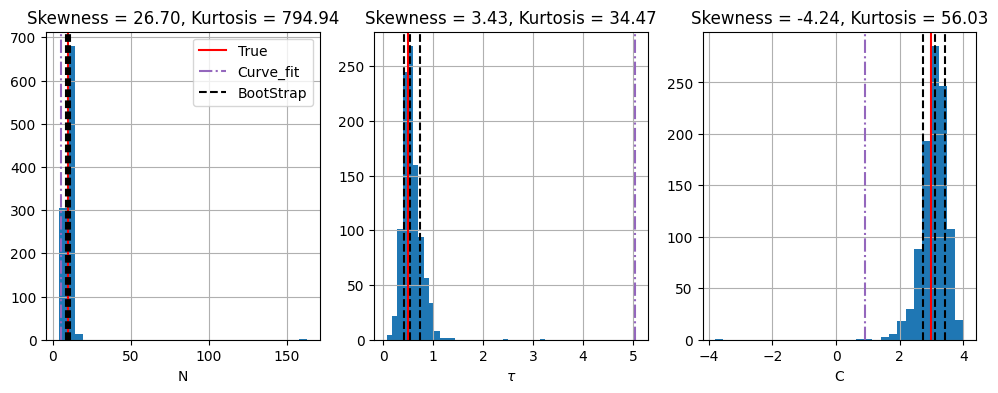

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (12,4))
param_names = ["N", "$\\tau$", "C"]
for i in range(3):
    quants = np.quantile(samples[:,i], q = [0.16, 0.5, 0.84])
    binning = np.linspace(true_parameters[i] - 5*perr[i], true_parameters[i] + 5*perr[i], 20)
    # axs[i].hist(samples[:,i], bins = binning)
    axs[i].hist(samples[:,i], bins = 30)
    axs[i].axvline(true_parameters[i], label = "True", color = "r", ls = "-")
    axs[i].axvline(popt[i], label = "Curve_fit", color = "C4", ls = "-.")
    axs[i].axvline(popt[i] + perr[i], color = "C4", ls = "-.")
    axs[i].axvline(popt[i] - perr[i], color = "C4", ls = "-.")


    axs[i].set_xlabel(param_names[i])
    axs[i].grid()
    if_label = "BootStrap"

    skew = sp.stats.skew(samples[:,i])
    kur = sp.stats.kurtosis(samples[:,i])
    axs[i].set_title(f"Skewness = {skew:0.2f}, Kurtosis = {kur:0.2f}")

    for q in quants:
        axs[i].axvline(q, color = "k", ls = "--", label = if_label)
        if_label = None
axs[0].legend();

## 3.6 Understanding Skewness and Kurtosis

A lot of the time, we assume that data is normally distributed. Whether or not the data is actually Gaussian can impact how we use the data and whether or not a specific test or algorithm is valid for use!

Skewness is defined as:

$$
g_1 = \frac{m_3}{m_2^{\frac{3}{2}}}
$$

Where:
$$
m_i = \frac{1}{N} \sum_{j=1}^{N} ( x[j] - \bar{x})^i
$$

We can think of this as a measurement of the orientation and separation of the mean, median, and mode of a distribution:
![link text](https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png)

As a rule of thumb:
* -0.5 < Skewness < 0.5: Approximately symmetric.
* -1 < Skewness < -0.5 or 0.5 < Skewness < 1: Moderately skewed.
* Skewness < -1 or Skewness > 1: Highly skewed.
* Skewness > 0: Right skewed.
* Skewness < 0: Left skewed.



We can see that the Skewness of the $\tau$ is large and positive, suggesting that it is highly skewed to the right.


Kurtosis tells us how much of the distribution is in the tails, compared to a normal distribution. This is defined as:
$$
\text{kurtosis} = \frac{n(n+1)}{(n-1)(n-2)(n-3)} \sum_{i=1}^n \left( \frac{x_i - \mu}{\sigma} \right)^4 - \frac{3(n-1)^2}{(n-2)(n-3)}
$$

It is common to report the "excess kurtosis", this is "kurtosis - 3" (with 3 being the kurtosis of a normal distribution). In `scipy.stats.kurtosis`, the default is to return the excess kurtosis, to override this pass `fisher=False`.

![](https://keytodatascience.com/wp-content/uploads/2021/11/Kurtosis1.jpg)

As a rule of thumb:
* Excess Kurtosis = 0 (Kurtosis = 3): The distribution has a normal level of tail weight.
* Excess Kurtosis > 0 (Kurtosis > 3): The distribution has **heavier tails and a sharper peak** (leptokurtic).
* Excess Kurtosis < 0 (Kurtosis < 3): The distribution has **lighter tails and a flatter peak** (platykurtic).


We can see all distributions show heavier tails, suggesting a large number of outliers.

## 3.7 Reporting Fit Values

With the information about the Skewness and Kurtosis, we know that best-fit parameters aren't guassian. Symmetric error bars ($\hat{\theta} \pm \Delta\theta$) don't accurately represent the uncertainty. Additional we know that some of the parameters have large tails with signficance outliers. It might be more approiate to report 90% containment rather than a $1\sigma$ uncertainty region.

`numpy.quantile` is useful for measuring the quantiles of a dataset.


In [ ]:
for i in range(3):
    p = np.quantile(samples[:,i], q=[0.5, 0.05, 0.95] )
    print (f"{param_names[i]} (Truth: {true_parameters[i]}) \t = {p[0]:0.2f} [{p[1]:0.2f}, {p[2]:0.2f}] \n\t-> (Curve Fit) {popt[i]:0.2f} +/- {perr[i] : 0.2f}")

N (Truth: 10) 	 = 9.79 [7.06, 12.57] 
	-> (Curve Fit) 5.24 +/-  inf
$\tau$ (Truth: 0.5) 	 = 0.55 [0.33, 0.92] 
	-> (Curve Fit) 5.05 +/-  inf
C (Truth: 3) 	 = 3.12 [2.38, 3.64] 
	-> (Curve Fit) 0.93 +/-  inf


# 4.0 Assignment

In this assignment, you will optimize a data fitting problem using **NumPy and Numba**. You are given a dataset generated from a **Gaussian peak with a linear background**, but with an additional **cutoff in x**, meaning any values where $ x < C_{\text{cutoff}} $ are set to zero.

Your task is to: <b> Optimize the function which acts as a model for our data </b>.

At the end, you will use **SciPy’s `curve_fit`** to fit the model parameters, including the cutoff.

---

### **Problem Statement**
A Gaussian peak with background is given by:

$$
f(x) =
\begin{cases}
A e^{-\frac{(x - x_0)^2}{2\sigma^2}} + Bx + C, & \text{if } x > C_{\text{cutoff}} \\
0, & \text{otherwise}
\end{cases}
$$

where:
- $ A $ = Amplitude of the Gaussian peak
- $ x_0 $ = Center of the Gaussian peak
- $ \sigma $ = Width of the Gaussian peak
- $ B $ = Slope of the linear background
- $ C $ = Offset of the linear background
- $ C_{\text{cutoff}} $ = Cutoff point in \( x \) (to be fitted)

The dataset contains **noise**, and your goal is to recover the original parameters by **fitting** this function to the data.


The data is hidden, please only consult if you need additional hints.


---

### **Hints**

1. Use `line_profile` to identify bottlenecks:
```
  %lprun -f function_name function_name(x, y, z)
```
2. Use `%time` and `%timeit` to measure performance
3. Consider how evaluating logic within loops can effect vectorized (array-wise) operations.
4. Consider pre-compiling!

In [ ]:
# @title
import numpy as np
import scipy.optimize as opt
from numba import vectorize

np.random.seed(42)
x = np.linspace(-5, 10, 100)

# True parameters
A_true, x0_true, sigma_true, B_true, C_true, cutoff_true = 5.0, 5.0, 1.0, 0.5, 2.0, 1.0  # Cutoff at x = 3
p_true = [A_true, x0_true, sigma_true, B_true, C_true, cutoff_true]
# Generate true values
y_true = A_true * np.exp(-((x - x0_true) ** 2) / (2 * sigma_true ** 2)) + B_true * x + C_true

# Apply cutoff to x
y_true[x < cutoff_true] = 0

# Add noise
y_noisy = y_true + np.random.randn(len(x))

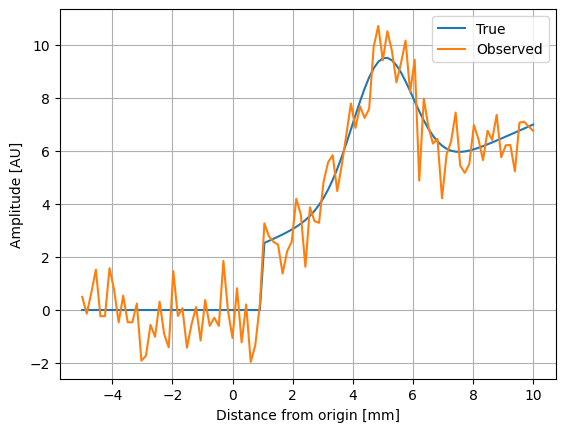

In [ ]:

plt.plot(x, y_true, label = "True")
plt.plot(x, y_noisy, label = "Observed")
plt.xlabel("Distance from origin [mm]")
plt.ylabel("Amplitude [AU]")
plt.grid()
plt.legend();


In [ ]:
# Unoptimized function
def gaussian_with_background(x, A, x0, sigma, B, C, C_cutoff):
    result = []
    for xi in x:
        if xi < C_cutoff:
            result.append(0.)
        else:
            value = A * np.exp(-((xi - x0) ** 2) / (2 * sigma ** 2)) + B * xi + C
            result.append(value)
    return np.array(result)


guess = [1, 5, 1, 0.1, 1, 2]

# Fit the data
%timeit popt, pcov = opt.curve_fit(gaussian_with_background, x, y_noisy, p0=guess)
popt, pcov = opt.curve_fit(gaussian_with_background, x, y_noisy, p0=guess)
perr = np.sqrt(np.diag(pcov))

print("Fitted Parameters (Unoptimized):")
for t, p, e in zip(p_true, popt, perr):
  print (f"{t} -> {p:0.2f} +/- {e:0.2f}")


<magic-timeit>:1: OptimizeWarning: Covariance of the parameters could not be estimated


7.49 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Fitted Parameters (Unoptimized):
5.0 -> 5.24 +/- inf
5.0 -> 5.05 +/- inf
1.0 -> 0.93 +/- inf
0.5 -> 0.45 +/- inf
2.0 -> 2.37 +/- inf
1.0 -> 2.00 +/- inf


<ipython-input-138-f63519f95ccd>:17: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = opt.curve_fit(gaussian_with_background, x, y_noisy, p0=guess)


In [ ]:
%lprun -f gaussian_with_background gaussian_with_background(x, *p_true)

In [ ]:
# Optimized function using NumPy
def gaussian_with_background_numpy(x, A, x0, sigma, B, C, C_cutoff):
    result = A * np.exp(-((x - x0) ** 2) / (2 * sigma ** 2)) + B * x + C
    return np.where(x > C_cutoff, result, 0.)  # Apply cutoff in x

# Fit using the NumPy-optimized function
%timeit popt_numpy, pcov_numpy = opt.curve_fit(gaussian_with_background_numpy, x, y_noisy, p0=guess)
popt_numpy, pcov_numpy = opt.curve_fit(gaussian_with_background_numpy, x, y_noisy, p0=guess)
perr_numpy = np.sqrt(np.diag(pcov_numpy))
print("Fitted Parameters (NumPy):")
for t, p, e in zip(p_true, popt_numpy, perr_numpy):
  print (f"{t} -> {p:0.2f} +/- {e:0.2f}")

<magic-timeit>:1: OptimizeWarning: Covariance of the parameters could not be estimated


2.1 ms ± 542 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Fitted Parameters (NumPy):
5.0 -> 5.24 +/- inf
5.0 -> 5.05 +/- inf
1.0 -> 0.93 +/- inf
0.5 -> 0.45 +/- inf
2.0 -> 2.37 +/- inf
1.0 -> 2.00 +/- inf


<ipython-input-140-bcd810126830>:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_numpy, pcov_numpy = opt.curve_fit(gaussian_with_background_numpy, x, y_noisy, p0=guess)


In [ ]:
# Fully optimized using Numba's vectorize
@jit(nopython=True)
def gaussian_with_background_numba(x, A, x0, sigma, B, C, C_cutoff):
    res = A * np.exp(-((x - x0) ** 2) / (2 * sigma ** 2)) + B * x + C
    res[x<C_cutoff] = 0.0
    return res

# Fit using the Numba-optimized function
%timeit popt_numba, pcov_numba = opt.curve_fit(gaussian_with_background_numba, x, y_noisy, p0=guess)

popt_numba, pcov_numba = opt.curve_fit(gaussian_with_background_numba, x, y_noisy, p0=guess)
perr_numba = np.sqrt(np.diag(pcov_numba))

print("Fitted Parameters (Numba):")
for t, p, e in zip(p_true, popt_numba, perr_numba):
  print (f"{t} -> {p:0.2f} +/- {e:0.2f}")

833 µs ± 103 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
Fitted Parameters (Numba):
5.0 -> 5.24 +/- inf
5.0 -> 5.05 +/- inf
1.0 -> 0.93 +/- inf
0.5 -> 0.45 +/- inf
2.0 -> 2.37 +/- inf
1.0 -> 2.00 +/- inf


<magic-timeit>:1: OptimizeWarning: Covariance of the parameters could not be estimated
<ipython-input-141-e3e4f175d99e>:11: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_numba, pcov_numba = opt.curve_fit(gaussian_with_background_numba, x, y_noisy, p0=guess)


## 4.1 Bonus Questions:

How can we report the uncertainties?

In [ ]:
samples = bootstrap(gaussian_with_background_numba, x, y_noisy, p0 = guess, nboot = 1000)

<ipython-input-132-72b055b281b7>:32: OptimizeWarning: Covariance of the parameters could not be estimated
  p, _ = sp.optimize.curve_fit(func, x_samp, y_samp, p0=p0, maxfev = 10000 )


In [ ]:
samples.shape

(1000, 6)

<ipython-input-144-15ac1bd7c2b3>:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = sp.stats.skew(samples[:,i])
<ipython-input-144-15ac1bd7c2b3>:19: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kur = sp.stats.kurtosis(samples[:,i])


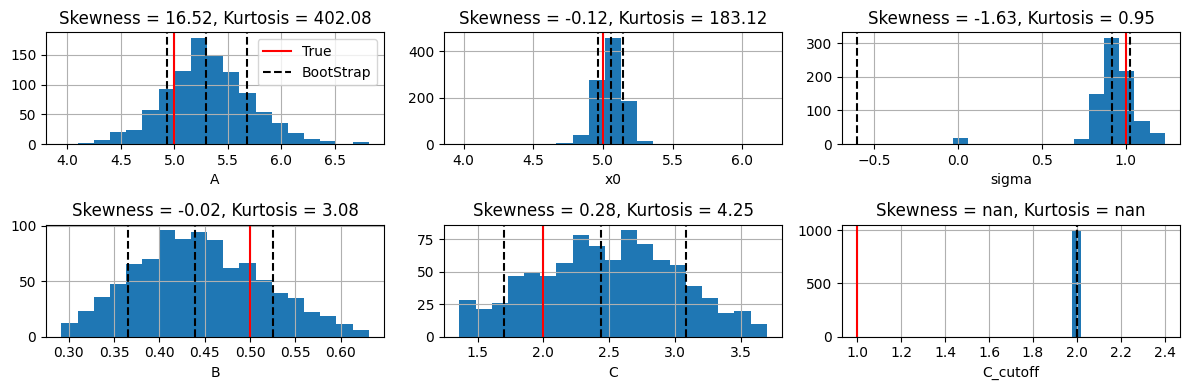

In [ ]:
param_names = ["A", "x0", "sigma", "B", "C", "C_cutoff"]
fig, axs = plt.subplots(2,samples.shape[1] // 2, figsize = (12,4))
for i, ax in enumerate(axs.ravel()):
    quants = np.quantile(samples[:,i], q = [0.16, 0.5, 0.84])
    binning = np.linspace(0.8*quants[0], 1.2*quants[-1], 20)
    ax.hist(samples[:,i], bins = binning)
    # ax.hist(samples[:,i], bins = 30)
    ax.axvline(p_true[i], label = "True", color = "r", ls = "-")
    # axs[i].axvline(popt[i], label = "Curve_fit", color = "C4", ls = "-.")
    # axs[i].axvline(popt[i] + perr[i], color = "C4", ls = "-.")
    # axs[i].axvline(popt[i] - perr[i], color = "C4", ls = "-.")


    ax.set_xlabel(param_names[i])
    ax.grid()
    if_label = "BootStrap"

    skew = sp.stats.skew(samples[:,i])
    kur = sp.stats.kurtosis(samples[:,i])
    ax.set_title(f"Skewness = {skew:0.2f}, Kurtosis = {kur:0.2f}")

    for q in quants:
        ax.axvline(q, color = "k", ls = "--", label = if_label)
        if_label = None
axs[0,0].legend();
fig.tight_layout()


Minimizers often rely on the gradient of a function to find the minimum. Some methods, like stochastic **gradient** descent, explicitly require gradient information, while others determine it numerically using techniques such as [Automatic Differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation).  

A key requirement for many minimization algorithms is that the function being fitted must be **smooth and continuous**. In other words, the function should not have abrupt jumps or discontinuities, and its first derivative should not change abruptly. Mathematically, this means that at any point \( x \), the left-hand and right-hand derivatives should be equal:  

$$
\lim_{x \to x_0^-} \frac{df}{dx} = \lim_{x \to x_0^+} \frac{df}{dx}
$$

Now, consider the given function:  

$$
f(x) =
\begin{cases}
A e^{-\frac{(x - x_0)^2}{2\sigma^2}} + Bx + C, & \text{if } x > C_{\text{cutoff}} \\
0, & \text{otherwise}
\end{cases}
$$

At $ x = C_{\text{cutoff}} $, the function is discontinuous because the value of $ f(x) $ jumps from $ 0 $ to a nonzero value. Moreover, the derivative exhibits a **discontinuity** at this point:

$$
\lim_{x \to C_{\text{cutoff}}^-} \frac{\partial f}{\partial x} \neq \lim_{x \to C_{\text{cutoff}}^+} \frac{\partial f}{\partial x}
$$

Because of this discontinuity, minimization methods that rely on derivatives will struggle to estimate parameter uncertainties reliably. Many standard error estimation techniques, such as those based on the [**Hessian matrix**](https://en.wikipedia.org/wiki/Hessian_matrix) (which requires second derivatives), assume smooth behavior and will fail or yield incorrect uncertainty estimates.

Can we approximate this "if statement" with a function? There are many that can be used, but let's consider a sigmoid function, with a constant offset ($c$) -- which will approximate $C_{cutoff}$-- and a weight parameter $w$ to control the transition between the two states:

$$
\text{sigmoid}(x, c, w) = \frac{1}{ 1 + e ^{- (x - c) / w}}
$$



In [ ]:
@jit(nopython=True)
def sigmoid(x, c =0, w =1):
    '''
    Sigmoid function with an additional offset and weight
    '''
    return 1/(1+np.exp(-(x - c) / w))

NameError: name 'jit' is not defined

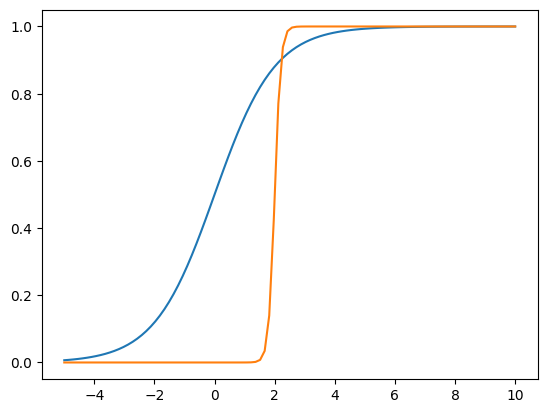

In [ ]:

plt.plot(x, sigmoid(x))
plt.plot(x, sigmoid(x,2, 1e-1))

In [ ]:
@jit(nopython=True)
def gaussian_with_background_numba_sigmoid(x, A, x0, sigma, B, C, C_cutoff):
    res = A * np.exp(-((x - x0) ** 2) / (2 * sigma ** 2)) + B * x + C

    res *= sigmoid(x, C_cutoff, w = 1e-1)
    return res

gaussian_with_background_numba_sigmoid(1,1,1,1,1,1,1)

1.5

In [ ]:
samples = bootstrap(gaussian_with_background_numba_sigmoid, x, y_noisy, p0 = guess, nboot = 1000)

<ipython-input-132-72b055b281b7>:32: OptimizeWarning: Covariance of the parameters could not be estimated
  p, _ = sp.optimize.curve_fit(func, x_samp, y_samp, p0=p0, maxfev = 10000 )


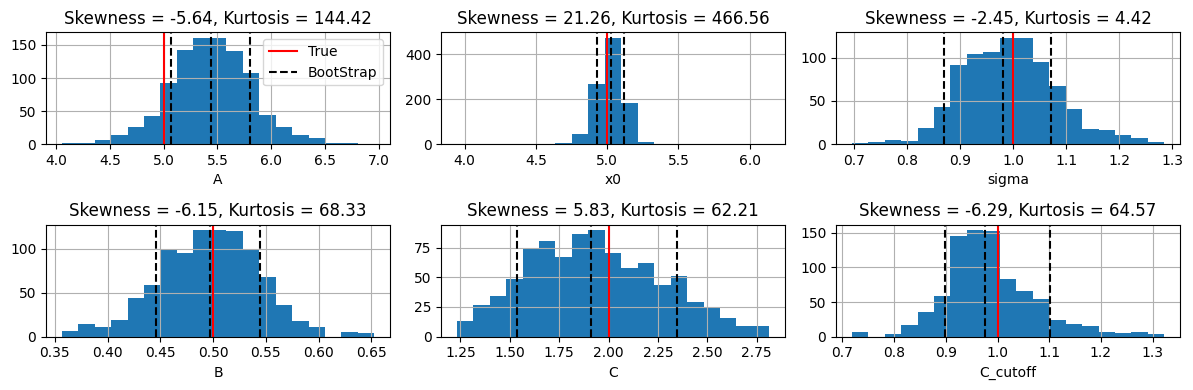

In [ ]:
param_names = ["A", "x0", "sigma", "B", "C", "C_cutoff"]
fig, axs = plt.subplots(2,samples.shape[1] // 2, figsize = (12,4))
for i, ax in enumerate(axs.ravel()):
    quants = np.quantile(samples[:,i], q = [0.16, 0.5, 0.84])
    binning = np.linspace(0.8*quants[0], 1.2*quants[-1], 20)
    ax.hist(samples[:,i], bins = binning)
    # ax.hist(samples[:,i], bins = 30)
    ax.axvline(p_true[i], label = "True", color = "r", ls = "-")
    # axs[i].axvline(popt[i], label = "Curve_fit", color = "C4", ls = "-.")
    # axs[i].axvline(popt[i] + perr[i], color = "C4", ls = "-.")
    # axs[i].axvline(popt[i] - perr[i], color = "C4", ls = "-.")


    ax.set_xlabel(param_names[i])
    ax.grid()
    if_label = "BootStrap"

    skew = sp.stats.skew(samples[:,i])
    kur = sp.stats.kurtosis(samples[:,i])
    ax.set_title(f"Skewness = {skew:0.2f}, Kurtosis = {kur:0.2f}")

    for q in quants:
        ax.axvline(q, color = "k", ls = "--", label = if_label)
        if_label = None
axs[0,0].legend();
fig.tight_layout()

In [ ]:
p_best_fit = []
for i in range(len(param_names)):
    p = np.quantile(samples[:,i], q=[0.5, 0.05, 0.95] )
    p_best_fit.append(p[0])
    print (f"{param_names[i]} (Truth: {p_true[i]}) \t = {p[0]:0.2f} [{p[1]:0.2f}, {p[2]:0.2f}] \n\t-> (Curve Fit) {popt[i]:0.2f} +/- {perr[i] : 0.2f}")

A (Truth: 5.0) 	 = 5.44 [4.81, 6.07] 
	-> (Curve Fit) 5.24 +/-  inf
x0 (Truth: 5.0) 	 = 5.03 [4.86, 5.17] 
	-> (Curve Fit) 5.05 +/-  inf
sigma (Truth: 1.0) 	 = 0.98 [-0.80, 1.16] 
	-> (Curve Fit) 0.93 +/-  inf
B (Truth: 0.5) 	 = 0.50 [0.39, 0.58] 
	-> (Curve Fit) 0.45 +/-  inf
C (Truth: 2.0) 	 = 1.91 [1.21, 2.82] 
	-> (Curve Fit) 2.37 +/-  inf
C_cutoff (Truth: 1.0) 	 = 0.98 [0.66, 1.70] 
	-> (Curve Fit) 2.00 +/-  inf


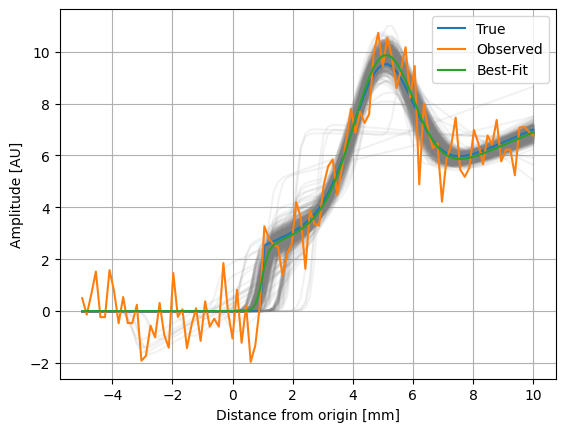

In [ ]:



for i in range(500):
    rnd_indx = np.random.randint(0, samples.shape[0])
    plt.plot(x, gaussian_with_background_numba_sigmoid(x, *samples[i,:]), color = "gray", alpha = 0.1)


plt.plot(x, y_true, label = "True")
plt.plot(x, y_noisy, label = "Observed")
plt.plot(x, gaussian_with_background_numba_sigmoid(x, *p_best_fit), label = "Best-Fit")

plt.xlabel("Distance from origin [mm]")
plt.ylabel("Amplitude [AU]")
plt.grid()
plt.legend();


In [ ]:
samples.shape

(1000, 6)